In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline
import matplotlib
pgf_with_rc_fonts = {
    "text.usetex": True,
    "text.latex.unicode": True,
    "font.family": "serif",
    "font.serif": [],                   # use latex default serif font
    "font.sans-serif": ["DejaVu Sans"], # use a specific sans-serif font
    "pgf.preamble": [
        r'\usepackage{amsmath}',
        r'\usepackage{gensymb}',
        r'\usepackage{siunitx}',
        r'\DeclareSIUnit{\revolution}{rev}',
    ]
}
matplotlib.rcParams.update(pgf_with_rc_fonts)

import matplotlib.pyplot as plt

import pandas as pd
import os

# Background Color
bg = '#d3e9f8'

import ingest
import numpy as np
import ingest

df = ingest.setup('../../valid/capture/capture1')

Dropped 1 outlier coordinate


In [2]:
# Generate bearings for each pass
import warnings
from bearing_error import error, error_methods
warnings.filterwarnings('ignore')
errors = error(df, 'PCHIP')

HBox(children=(IntProgress(value=0, description='Preparing data', max=4342), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Interpolating', max=4342), HTML(value='')))

In [3]:
# from itertools import combinations
# import location_error

# # Process and create location_error.csv - takes hours! Only do this when necessary
# combs = [x for l in range(2,4) for x in combinations(pd.unique(df.test), l)]
# vector_errors = location_error.error(combs, df, errors, 'location_error.csv')

In [4]:
def fconv(val):
    try: 
        return float(val)
    except ValueError:
        return -1


def iconv(val):
    try: 
        return int(val)
    except ValueError:
        return -1


columns = ['test0', 'test1', 'test2', 'pass0', 'pass1', 'bssid', 'sample0', 'sample1', 'ray0_p_lat', 'ray0_p_lon', 'ray0_d_lat', 'ray0_d_lon', 'ray1_p_lat', 'ray1_p_lon', 'ray1_d_lat', 'ray1_d_lon', 'guess_lat', 'guess_lon', 'error_lat', 'error_lon', 'error_distance', 'mean_origin_distance']
obj = float
converters = {'pass2': iconv,
              'sample2': iconv,
              'samples': iconv,
              'ray2_p_lat': fconv,
              'ray2_p_lon': fconv,
              'ray2_d_lat': fconv,
              'ray2_d_lon': fconv,
             }
types = [str, str, str, int, int, str, int, int, obj, obj, obj, obj, obj, obj, obj, obj, float, float, float, float, float, float]
dtype = dict(zip(columns, types))
vector_errors = pd.read_csv('location_error.csv', converters=converters, dtype=dtype)

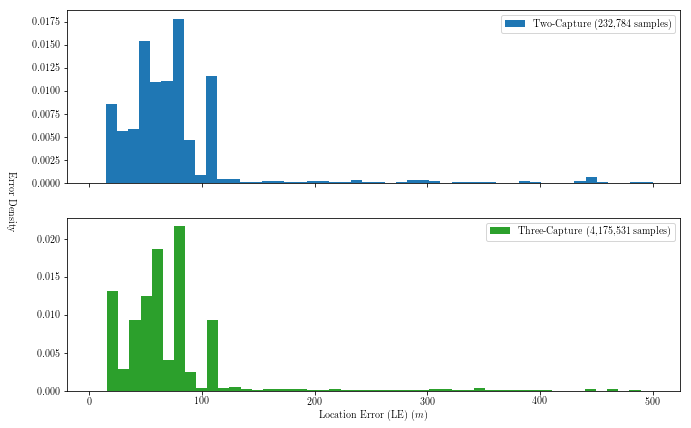

In [23]:
max_error = 500
min_dist_origin = 1

ve_filtered = vector_errors[(vector_errors['mean_origin_distance'] > min_dist_origin) & (vector_errors['error_distance'] < max_error)]
ve2 = ve_filtered[ve_filtered.test2.isnull()]['error_distance']
ve3 = ve_filtered[ve_filtered.test2.notnull()]['error_distance']
len_3 = len(ve3)
len_2 = len(ve2)
_n = 100000
ve2_sub = np.random.choice(ve2, (_n))
# ve2_sub = ve2_sub[ve2_sub<250]
ve3_sub = np.random.choice(ve3, (_n))
# ve3_sub = ve3_sub[ve3_sub<250]

f, (ax1, ax2) = plt.subplots(2, sharex=True)

ax1.hist(ve2_sub, 50, label='Two-Capture ({:,} samples)'.format(len_2), density=True)
ax1.legend()

ax2.hist(ve3_sub, 50, label='Three-Capture ({:,} samples)'.format(len_3), color='C2', density=True)
ax2.legend()

plt.rcParams["figure.figsize"] = [11, 7]

plt.xlabel(r'Location Error (LE)  ($m$)')
f.text(0.05, 0.5, r'Error Density', va='center', rotation=-90)


f.savefig('location_hist2.pgf')


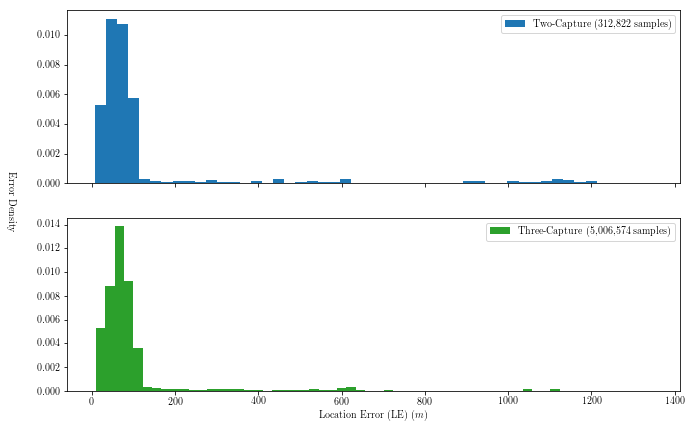

In [22]:
ve2 = vector_errors[vector_errors.test2.isnull()]['error_distance']
ve3 = vector_errors[vector_errors.test2.notnull()]['error_distance']
len_3 = len(ve3)
len_2 = len(ve2)
_n = 100000
ve2_sub = np.random.choice(ve2, (_n))
# ve2_sub = ve2_sub[ve2_sub<250]
ve3_sub = np.random.choice(ve3, (_n))
# ve3_sub = ve3_sub[ve3_sub<250]

f, (ax1, ax2) = plt.subplots(2, sharex=True)

ax1.hist(ve2_sub, 50, label='Two-Capture ({:,} samples)'.format(len_2), density=True)
ax1.legend()

ax2.hist(ve3_sub, 50, label='Three-Capture ({:,} samples)'.format(len_3), color='C2', density=True)
ax2.legend()

plt.rcParams["figure.figsize"] = [11, 7]

plt.xlabel(r'Location Error (LE)  ($m$)')
f.text(0.05, 0.5, r'Error Density', va='center', rotation=-90)

f.savefig('location_hist.pgf')


RESEARCH_MULLINS_1
9.24272971448


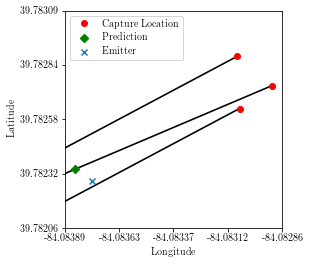

In [81]:
import vectors, capmap, random
from matplotlib.ticker import FormatStrFormatter


# Get 3 random results from the errors list
index = len(pd.unique(errors['pass']))
passes = np.random.randint(index,size=(3,1)).ravel()
columns = ['test0', 'test1', 'test2', 'pass0', 'pass1', 'pass2', 'bssid', 'sample0', 'sample1', 'sample2',
           'samples', 
           'ray0_p_lat', 'ray0_p_lon', 'ray0_d_lat', 'ray0_d_lon', 
           'ray1_p_lat', 'ray1_p_lon', 'ray1_d_lat', 'ray1_d_lon', 
           'ray2_p_lat', 'ray2_p_lon', 'ray2_d_lat', 'ray2_d_lon', 
           
           'guess_lat', 'guess_lon', 'error_lat', 'error_lon', 'error_distance']

# 3 Tests
s = vector_errors[(vector_errors.test2.notnull())]
#p = vector_errors.ix[random.sample(list(s.index),1)].iloc[0]
p = s.sort_values('error_distance').iloc[40]
#p = s.sort_values('error_distance', ascending=False).iloc[50000]
bssid = p.bssid
S0 = np.array([[p.ray0_p_lon, p.ray0_p_lat]])
D0 = np.array([[p.ray0_d_lon, p.ray0_d_lat]])

S1 = np.array([[p.ray1_p_lon, p.ray1_p_lat]])
D1 = np.array([[p.ray1_d_lon, p.ray1_d_lat]])

S2 = np.array([[p.ray2_p_lon, p.ray2_p_lat]])
D2 = np.array([[p.ray2_d_lon, p.ray2_d_lat]])

rays = [(S0, D0), (S1, D1), (S2, D2)]

# Get an origin
ray_start_positions = []    
for ray in rays:
    ray_start_positions.append(ray[0])
origin = np.stack(ray_start_positions).mean(axis=0)

# Get an object location
_lat = pd.unique(capmap.bearings[capmap.bearings['bssid'] == bssid]['lat_ap'])[0]
_lon = pd.unique(capmap.bearings[capmap.bearings['bssid'] == bssid]['lon_ap'])[0]
obj = np.array([[_lon, _lat]])

ax, fig = vectors.locate_real_rays(rays, obj)

# ax.set_yticklabels([])
# ax.set_xticklabels([])
# ax.tick_params(axis='both', which=u'both',length=0)
ax.legend()
lon = ax.xaxis
lat = ax.yaxis
lon.set_major_formatter(FormatStrFormatter('%.5f'))
lon.set_major_locator(LinearLocator(numticks=5))
lat.set_major_formatter(FormatStrFormatter('%.5f'))
lat.set_major_locator(LinearLocator(numticks=5))

plt.xlabel(r'Longitude')
plt.ylabel(r'Latitude')

plt.rcParams["figure.figsize"] = [4, 4]

fig.savefig('good_example.pgf', bbox_inches = 'tight')



print(capmap.get_names_from_bssid(bssid, True))
print(p.error_distance)

RESEARCH_MULLINS_6
453.779444397


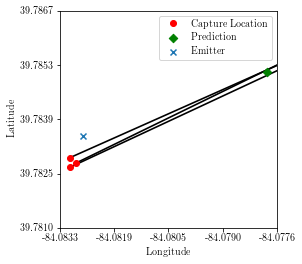

In [82]:
import vectors, capmap, random
from matplotlib.ticker import FormatStrFormatter


# Get 3 random results from the errors list
index = len(pd.unique(errors['pass']))
passes = np.random.randint(index,size=(3,1)).ravel()
columns = ['test0', 'test1', 'test2', 'pass0', 'pass1', 'pass2', 'bssid', 'sample0', 'sample1', 'sample2',
           'samples', 
           'ray0_p_lat', 'ray0_p_lon', 'ray0_d_lat', 'ray0_d_lon', 
           'ray1_p_lat', 'ray1_p_lon', 'ray1_d_lat', 'ray1_d_lon', 
           'ray2_p_lat', 'ray2_p_lon', 'ray2_d_lat', 'ray2_d_lon', 
           
           'guess_lat', 'guess_lon', 'error_lat', 'error_lon', 'error_distance']

# 3 Tests
s = vector_errors[(vector_errors.test2.notnull())]
#p = vector_errors.ix[random.sample(list(s.index),1)].iloc[0]
#p = s.sort_values('error_distance').iloc[40]
p = s.sort_values('error_distance', ascending=False).iloc[200000]
bssid = p.bssid
S0 = np.array([[p.ray0_p_lon, p.ray0_p_lat]])
D0 = np.array([[p.ray0_d_lon, p.ray0_d_lat]])

S1 = np.array([[p.ray1_p_lon, p.ray1_p_lat]])
D1 = np.array([[p.ray1_d_lon, p.ray1_d_lat]])

S2 = np.array([[p.ray2_p_lon, p.ray2_p_lat]])
D2 = np.array([[p.ray2_d_lon, p.ray2_d_lat]])

rays = [(S0, D0), (S1, D1), (S2, D2)]

# Get an origin
ray_start_positions = []    
for ray in rays:
    ray_start_positions.append(ray[0])
origin = np.stack(ray_start_positions).mean(axis=0)

# Get an object location
_lat = pd.unique(capmap.bearings[capmap.bearings['bssid'] == bssid]['lat_ap'])[0]
_lon = pd.unique(capmap.bearings[capmap.bearings['bssid'] == bssid]['lon_ap'])[0]
obj = np.array([[_lon, _lat]])

ax, fig = vectors.locate_real_rays(rays, obj)

# ax.set_yticklabels([])
# ax.set_xticklabels([])
# ax.tick_params(axis='both', which=u'both',length=0)
ax.legend()
lon = ax.xaxis
lat = ax.yaxis
lon.set_major_formatter(FormatStrFormatter('%.4f'))
lon.set_major_locator(LinearLocator(numticks=5))
lat.set_major_formatter(FormatStrFormatter('%.4f'))
lat.set_major_locator(LinearLocator(numticks=5))

plt.xlabel(r'Longitude')
plt.ylabel(r'Latitude')
plt.rcParams["figure.figsize"] = [4, 4]


fig.savefig('bad_example.pgf', bbox_inches = 'tight')



print(capmap.get_names_from_bssid(bssid, True))
print(p.error_distance)

RESEARCH_MULLINS_1
1130.96875263


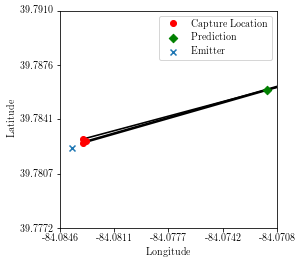

In [77]:
import vectors, capmap, random
from matplotlib.ticker import FormatStrFormatter, LinearLocator, ScalarFormatter


# Get 3 random results from the errors list
index = len(pd.unique(errors['pass']))
passes = np.random.randint(index,size=(3,1)).ravel()
columns = ['test0', 'test1', 'test2', 'pass0', 'pass1', 'pass2', 'bssid', 'sample0', 'sample1', 'sample2',
           'samples', 
           'ray0_p_lat', 'ray0_p_lon', 'ray0_d_lat', 'ray0_d_lon', 
           'ray1_p_lat', 'ray1_p_lon', 'ray1_d_lat', 'ray1_d_lon', 
           'ray2_p_lat', 'ray2_p_lon', 'ray2_d_lat', 'ray2_d_lon', 
           
           'guess_lat', 'guess_lon', 'error_lat', 'error_lon', 'error_distance']

# 3 Tests
s = vector_errors[(vector_errors.test2.notnull())]
#p = vector_errors.ix[random.sample(list(s.index),1)].iloc[0]
#p = s.sort_values('error_distance').iloc[40]
p = s.sort_values('error_distance', ascending=False).iloc[1]
bssid = p.bssid
S0 = np.array([[p.ray0_p_lon, p.ray0_p_lat]])
D0 = np.array([[p.ray0_d_lon, p.ray0_d_lat]])

S1 = np.array([[p.ray1_p_lon, p.ray1_p_lat]])
D1 = np.array([[p.ray1_d_lon, p.ray1_d_lat]])

S2 = np.array([[p.ray2_p_lon, p.ray2_p_lat]])
D2 = np.array([[p.ray2_d_lon, p.ray2_d_lat]])

rays = [(S0, D0), (S1, D1), (S2, D2)]

# Get an origin
ray_start_positions = []    
for ray in rays:
    ray_start_positions.append(ray[0])
origin = np.stack(ray_start_positions).mean(axis=0)

# Get an object location
_lat = pd.unique(capmap.bearings[capmap.bearings['bssid'] == bssid]['lat_ap'])[0]
_lon = pd.unique(capmap.bearings[capmap.bearings['bssid'] == bssid]['lon_ap'])[0]
obj = np.array([[_lon, _lat]])

ax, fig = vectors.locate_real_rays(rays, obj)
# ax.set_yticklabels([])
# ax.set_xticklabels([])
# ax.tick_params(axis='both', which=u'both',length=0)
ax.legend()
lon = ax.xaxis
lat = ax.yaxis
lon.set_major_formatter(FormatStrFormatter('%.4f'))
lon.set_major_locator(LinearLocator(numticks=5))
lat.set_major_formatter(FormatStrFormatter('%.4f'))
lat.set_major_locator(LinearLocator(numticks=5))

plt.xlabel(r'Longitude')
plt.ylabel(r'Latitude')
plt.rcParams["figure.figsize"] = [4, 4]


fig.savefig('real_bad_example.pgf', bbox_inches = 'tight')



print(capmap.get_names_from_bssid(bssid, True))
print(p.error_distance)